## Plot Histograms of Raster Values in Python

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rioxarray as rxr
import earthpy as et

In [3]:
# Get data and set wd
et.data.get_data("colorado-flood")

os.chdir(os.path.join(et.io.HOME,
                     'earth-analytics',
                     'data')
# Plot with seaborn
sns.set(font_scale=1.5,style="whitegrid")

how to explore the data values in a raster dataset using histogram plots. by opening your raster data using `rxr.open_rasterio()`.

In [5]:
# Define relative path to file
lidar_dem_path = os.path.join("colorado-flood",
                              "spatial",
                             "boulder-leehill-rd",
                             "pre-flood",
                             "lidar",
                             "pre_DTM.tif")

# Open data
lidar_dem_img = rxr.open_rasterio(lidar_dem_path)

# View object dimensions
lidar_dem_img.shape

(1, 2000, 4000)

## Raster Histograms - Distribution of Elevation Values
The histogram below represents the distribution of pixel elevation values in your data. This plot is useful to:

    1. Identify outlier data values
    2. Assess the min and max values in your data
    3. Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

It’s often good practice to view histograms of your data before beginning to work with it as a data exploration step. Histograms will tell you a lot about the distribution of values in your data. They will also sometimes help you identify issues associated with processing your data.

To begin, look at the shape of the histogram below which represents pixel values for your lidar DEM data. Notice that there is an unusual skew to your data. Often times when you see a skew like this with many values on one side of the plot, it means that there are outlier data values in your data OR missing data values that you need to deal with.

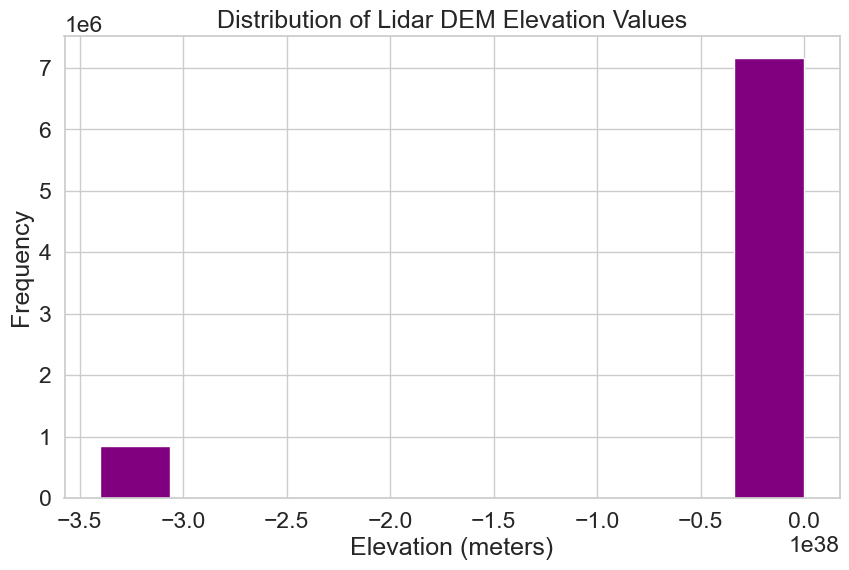

In [8]:
# plot a histogram 
f, ax = plt.subplots(figsize=(10,6))
lidar_dem_img.plot.hist(ax=ax,
                      color="purple")

ax.set(title="Distribution of Lidar DEM Elevation Values",
      xlabel='Elevation (meters)',
      ylabel='Frequency')
plt.show()

This plot displays a histogram of lidar dem elevation values where there is a no data value skewing the histogram. Look closely at the histogram below created after masking the nodata values from the data.

A histogram shows us how the data are distributed. Each bin or bar in the plot represents the number or frequency of pixels that fall within the range specified by the bin.

You can use the `bins=` argument to specify fewer or more breaks in your histogram. Note that this argument does not result in the exact number of breaks that you may want in your histogram.

Below, you open up the data again but specify `masked=True` which will mask any fill or nodata values. Notice the difference in your resulting histogram.

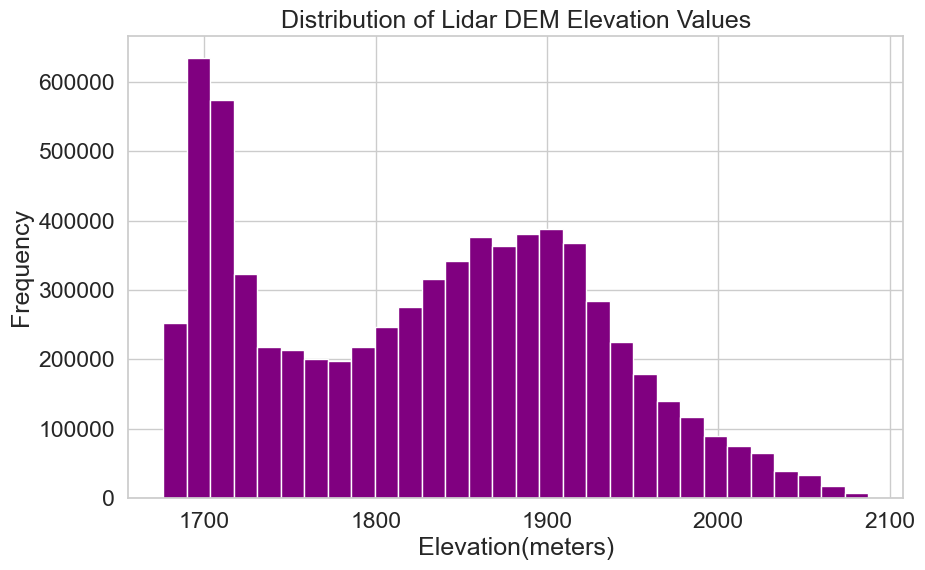

In [9]:
# Open data
lidar_dem_img = rxr.open_rasterio(lidar_dem_path,masked=True)

# Plot a histogram
f, ax = plt.subplots(figsize=(10,6))
lidar_dem_img.plot.hist(ax=ax,
                       color='purple',
                       bins=30)

ax.set(title="Distribution of Lidar DEM Elevation Values",
      xlabel = 'Elevation(meters)',
      ylabel = 'Frequency')
plt.show()

### Customize Your Hstogram
Alternatively, you can specify specific break points that you want Python to use when it bins the data. Specifying custom break points can be a good way to begin to look for patterns in the data. In the next chapter, you will use this approach to identify visual break points that might make sense to use when manually classifying your data.

`bins=[1600, 1800, 2000, 2100]`

In this case, Python will count the number of pixels that occur within each value range as follows:

1. bin 1: number of pixels with values between 1600-1800
2. bin 2: number of pixels with values between 1800-2000
3. bin 3: number of pixels with values between 2000-2100

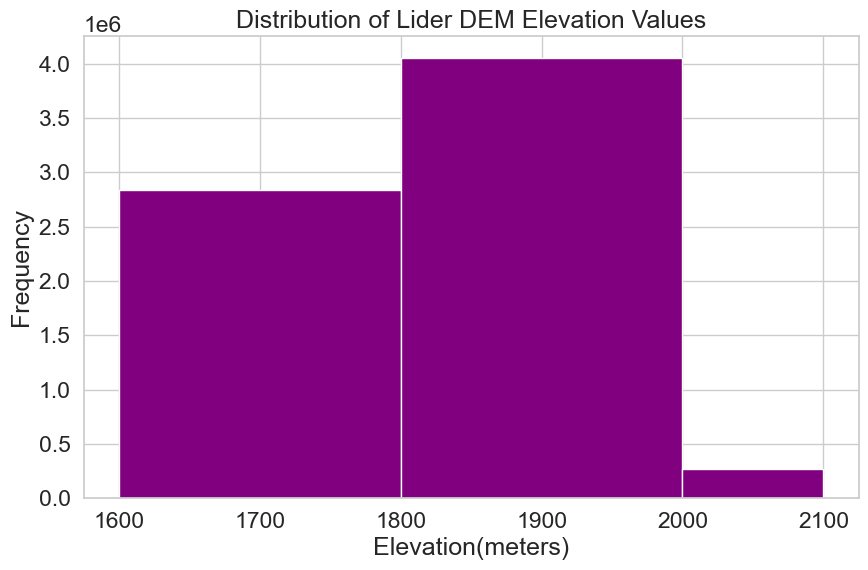

In [10]:
f, ax = plt.subplots(figsize=(10,6))
lidar_dem_img.plot.hist(ax=ax,
                       color='purple',
                       bins=[1600,1800,2000,2100])

ax.set(title='Distribution of Lider DEM Elevation Values',
      xlabel='Elevation(meters)',
      ylabel='Frequency')
plt.show()